In [7]:
from pathlib import Path
import cv2
import  numpy as np, cv2, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
DATA_DIR = r"C:\TensorFlow\pictures"
IMG_SIZE = (128, 128)

In [9]:
def load_iamges_labels(folder):
    paths = sorted(Path(folder).glob("*.jpg"))

    imgs = []
    labels = []

    for p in paths:
        img = cv2.imread(str(p))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgs.append(img)
        labels.append(int(str(p).split("_")[-1].split(".")[0]))

    return imgs, labels


In [10]:
imgs, labels = load_iamges_labels(DATA_DIR)

In [11]:
len(imgs)

2966

In [12]:
len(labels)

2966

In [13]:
def preprocess_image(img, target_size=IMG_SIZE):
    return cv2.resize(img, target_size)


def preprocess_batch(imgs, target_size=IMG_SIZE):
    out = [preprocess_image(img, target_size) for img in imgs]
    out = np.asarray(out) / 255
    return out


In [14]:
y = np.asarray(labels)

In [15]:
y

array([ 79, 107, 105, ..., 109, 111,  89], shape=(2966,))

In [16]:
X = preprocess_batch(imgs)

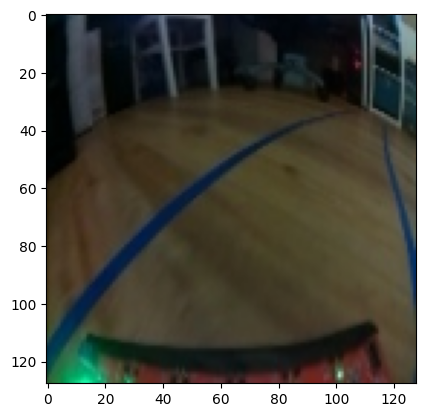

In [17]:
plt.imshow(X[19, :, :, :])

In [18]:
def show_examples(images, labels, n=8, title="Beispiele"):
    n = min(n, len(images))
    idx = np.random.choice(len(images), n, replace=False)
    cols = 4; rows = int(np.ceil(n / cols))
    plt.figure(figsize=(12, 3*rows))
    for i, j in enumerate(idx, 1):
        plt.subplot(rows, cols, i)
        img = images[j]
        if img.dtype != np.uint8:
            img = (np.clip(img, 0, 1) * 255).astype(np.uint8)
        plt.imshow(img); plt.title(f"Label: {labels[j]}"); plt.axis("off")
    plt.suptitle(title); plt.tight_layout(); plt.show()

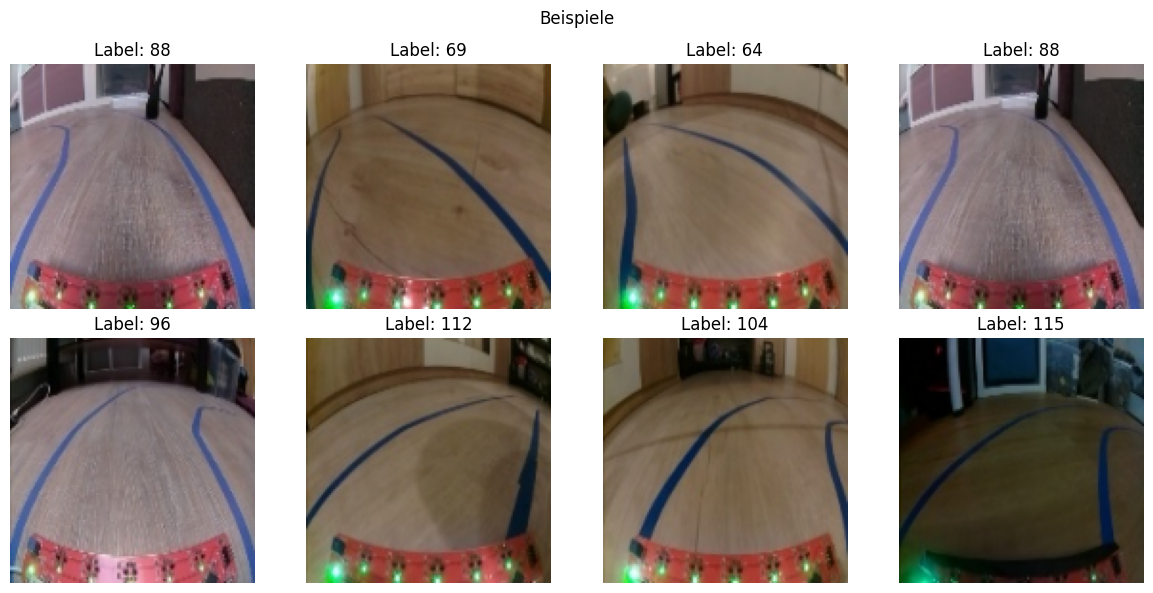

In [19]:
show_examples(X, y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape

(2372, 128, 128, 3)

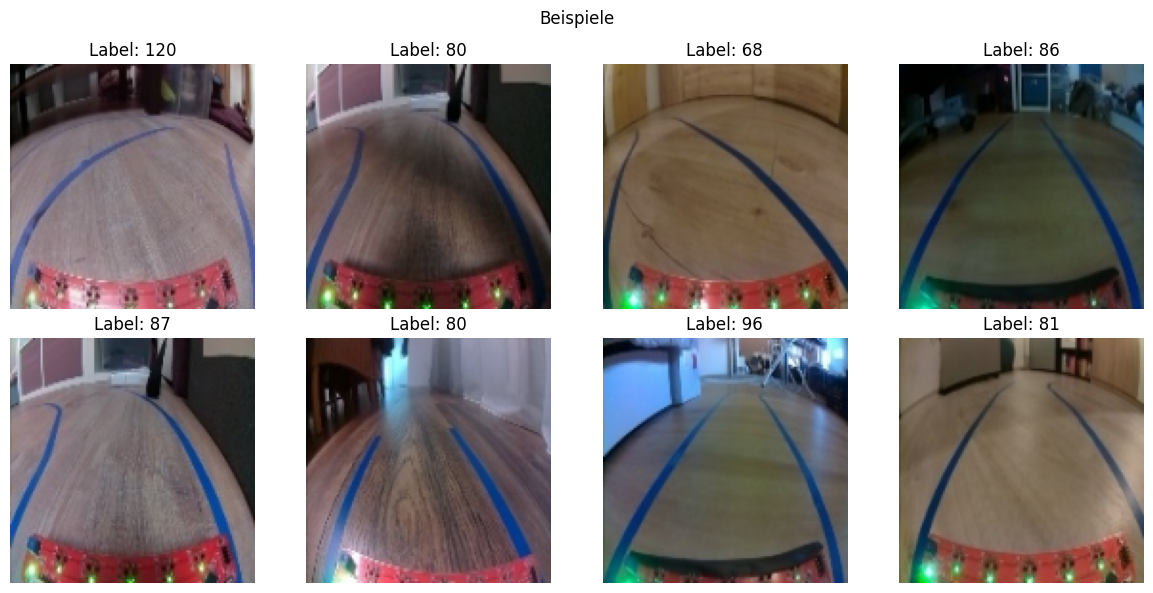

In [22]:
show_examples(X_train, y_train)

In [23]:
def mirror_with_label(images, labels):
    X_m = [ img[:,::-1, :]  for img in images]
    y_m = [180 - label for label in labels]

    return X_m, y_m

In [24]:
X_train_m, y_train_m = mirror_with_label(X_train, y_train)

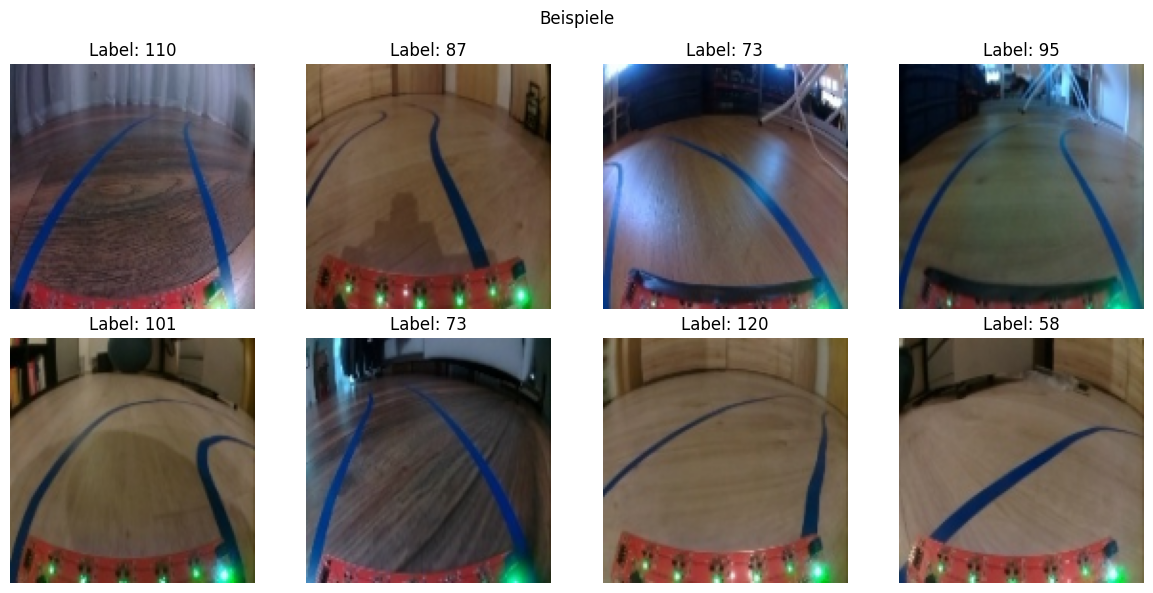

In [25]:
show_examples(X_train_m, y_train_m)

In [26]:
X_train_pool = np.concatenate([X_train , X_train_m])
y_train_pool = np.concatenate([y_train , y_train_m])

In [27]:
X_train_pool.shape

(4744, 128, 128, 3)

In [28]:
y_train_pool.shape

(4744,)

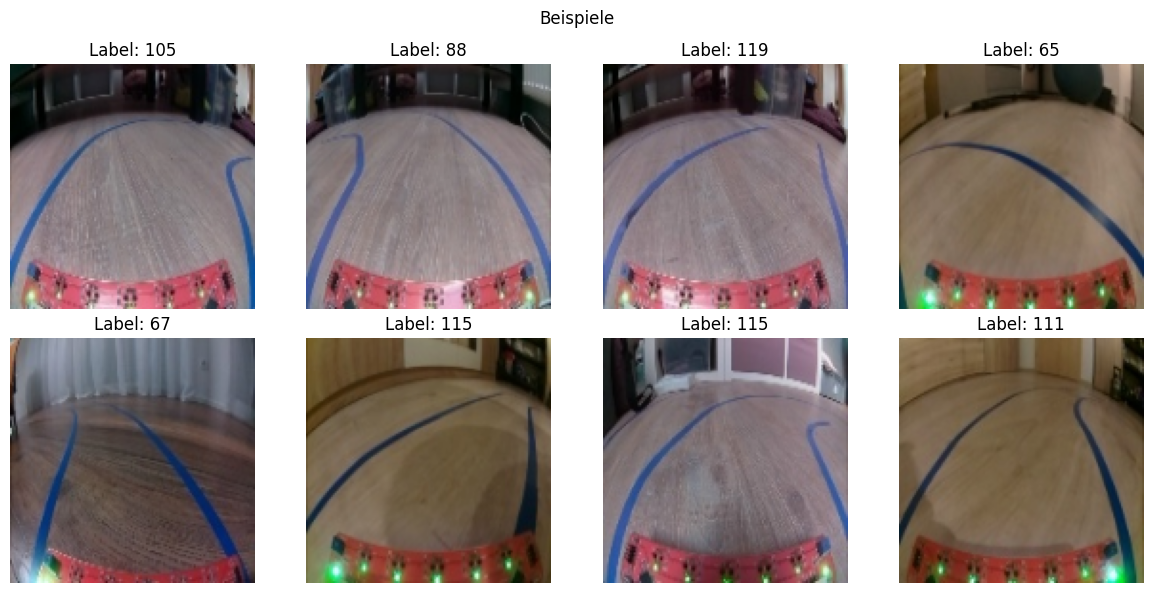

In [29]:
show_examples(X_train_pool, y_train_pool)

(array([  9.,  37.,  94.,  71.,  79., 113.,  85.,  59.,  40.,   7.]),
 array([ 45. ,  53.9,  62.8,  71.7,  80.6,  89.5,  98.4, 107.3, 116.2,
        125.1, 134. ]),
 <BarContainer object of 10 artists>)

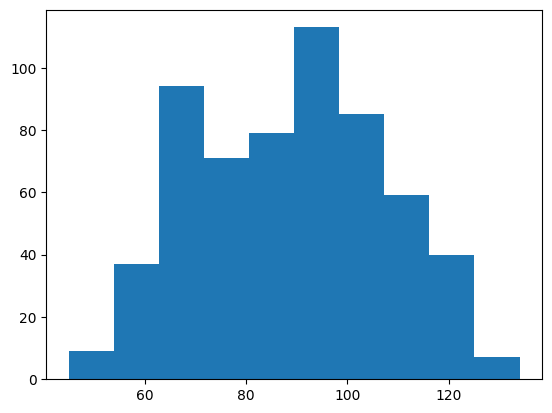

In [30]:
plt.hist(y_test)

In [31]:
size = (*IMG_SIZE, 3)
size


(128, 128, 3)

In [32]:
model = keras.Sequential([
    layers.Input(shape=size),
    layers.Conv2D(16, (3, 3), activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(32, (5, 5), activation="relu"),
    layers.MaxPooling2D(2),
    layers.Dropout(0.25),
    #layers.Conv2D(64, (3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(1)
])


In [33]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [34]:
history = model.fit(X_train_pool, y_train_pool, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 779.8899 - mae: 20.8090 - val_loss: 350.0014 - val_mae: 14.8961
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 316.6793 - mae: 13.8438 - val_loss: 178.1840 - val_mae: 10.1790
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 269.2639 - mae: 12.7513 - val_loss: 134.7942 - val_mae: 8.7948
Epoch 4/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 238.5097 - mae: 11.9621 - val_loss: 228.0968 - val_mae: 12.4099
Epoch 5/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 216.1826 - mae: 11.3794 - val_loss: 113.5547 - val_mae: 8.0961
Epoch 6/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 195.4633 - mae: 10.8134 - val_loss: 94.2251 - val_mae: 6.8352
Epoch 7/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 184.3346 - mae: 10.5457 - val_loss: 93.9569 - val_mae: 7.1997
Epoch 8/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 187.5172 - mae: 10.6132 - val_loss: 104.4494 - val_mae: 7.9355
Epoch 9

In [35]:
36,6**0.5

(36, 2.449489742783178)

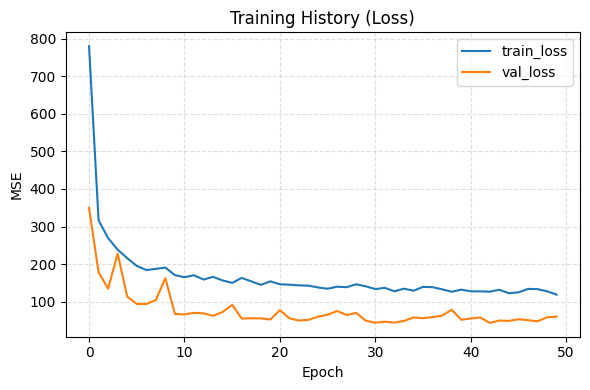

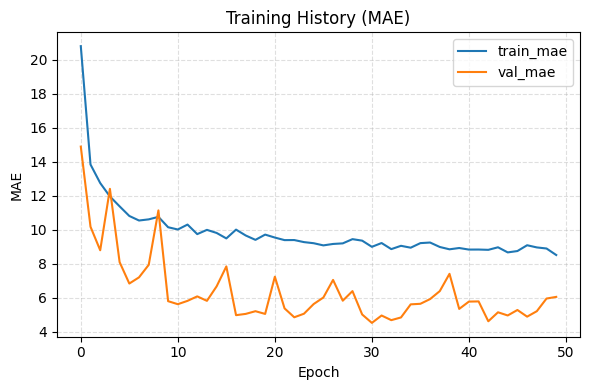

In [36]:
# History-Plots
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch"); plt.ylabel("MSE"); plt.title("Training History (Loss)")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.4); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history["mae"], label="train_mae")
plt.plot(history.history["val_mae"], label="val_mae")
plt.xlabel("Epoch"); plt.ylabel("MAE"); plt.title("Training History (MAE)")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.4); plt.tight_layout(); plt.show()


In [37]:
y_pred = model.predict(X_test).ravel()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [38]:
y_pred

array([117.5458  ,  95.860016,  86.520325,  64.215614,  71.06099 ,
        69.77374 ,  94.46758 ,  82.57948 ,  97.47496 ,  72.720276,
        90.48822 ,  76.12382 , 105.029045,  55.81169 ,  65.83208 ,
       103.86644 ,  60.02879 , 118.33495 ,  86.54063 ,  83.85231 ,
        98.22467 ,  86.21057 ,  57.839165,  86.936874, 107.036606,
       110.82031 ,  89.890335, 107.26607 , 106.784546,  97.33931 ,
        81.939255, 117.250725,  84.33991 ,  97.36647 ,  99.560036,
        92.83105 ,  88.687546,  85.80911 ,  63.358917,  70.524506,
        94.46452 ,  99.05533 ,  66.16162 ,  86.83214 , 102.62363 ,
        67.35217 ,  83.76477 ,  66.27823 ,  95.67937 ,  80.14759 ,
        84.12035 ,  65.82336 ,  70.04978 ,  90.20947 , 118.493866,
        84.094894,  93.91667 ,  89.30366 ,  82.65811 ,  80.175804,
        56.927673, 104.844406,  77.50177 , 104.04198 , 127.252716,
        85.02106 ,  82.187096,  87.50601 ,  63.43962 , 106.60757 ,
        91.48528 ,  96.316956,  87.71211 ,  59.89377 ,  68.516

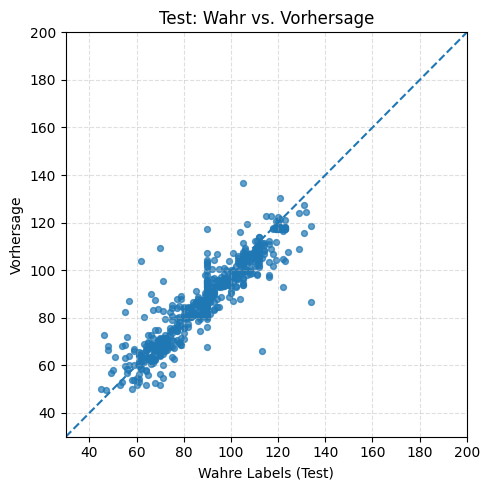

In [39]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=18, alpha=0.7)
plt.plot([30,200],[30,200], linestyle="--")
plt.xlim(30,200); plt.ylim(30,200)
plt.xlabel("Wahre Labels (Test)"); plt.ylabel("Vorhersage")
plt.title("Test: Wahr vs. Vorhersage"); plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

In [40]:
error = np.abs(y_pred - y_test)

In [41]:
error

array([5.45420074e+00, 1.86001587e+00, 2.47967529e+00, 2.21561432e+00,
       1.06098938e+00, 4.77374268e+00, 2.53241730e+00, 7.42051697e+00,
       1.52503967e+00, 7.72027588e+00, 1.51177979e+00, 3.87618256e+00,
       2.02904510e+00, 9.18830872e+00, 4.71679230e+01, 1.13356018e+00,
       1.02878952e+00, 4.66504669e+00, 1.54062653e+00, 4.14768982e+00,
       3.77532959e+00, 1.78942871e+00, 7.83916473e+00, 1.06312561e+00,
       4.96339417e+00, 5.17968750e+00, 1.09664917e-01, 6.26606750e+00,
       4.21545410e+00, 3.66069031e+00, 2.06074524e+00, 1.74927521e+00,
       2.33991241e+00, 2.63352966e+00, 3.43996429e+00, 2.83104706e+00,
       1.31245422e+00, 2.19088745e+00, 1.23589172e+01, 1.52450562e+00,
       4.53547668e+00, 2.94467163e+00, 5.83837891e+00, 4.16786194e+00,
       2.37637329e+00, 8.64782715e+00, 3.76477051e+00, 7.21771240e-01,
       5.67936707e+00, 2.85240936e+00, 5.87964630e+00, 4.17664337e+00,
       1.95021820e+00, 2.09472656e-01, 5.06134033e-01, 2.09489441e+00,
      

In [42]:
np.argmax(error)

np.int64(552)

In [43]:
y_test[23]

np.int64(88)

In [44]:
y_pred[23]

np.float32(86.936874)

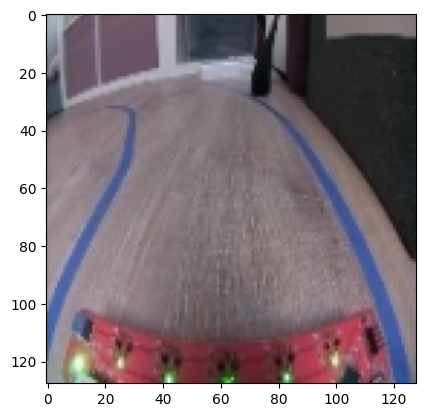

In [45]:
plt.imshow(X_test[23, :,: ,:])

In [46]:
model.save("live_model.keras")

In [47]:
import tensorflow as tf


# Auf Windows in tflite konvertieren


In [48]:
model = tf.keras.models.load_model("live_model.keras")


In [49]:
# 2) TFLite-Konverter
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# 3) Speichern
with open("live_model_fp32.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\vagui\AppData\Local\Temp\tmpkpjbah9t\assets


INFO:tensorflow:Assets written to: C:\Users\vagui\AppData\Local\Temp\tmpkpjbah9t\assets


Saved artifact at 'C:\Users\vagui\AppData\Local\Temp\tmpkpjbah9t'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2206414436512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2207019224928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2207019597888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2207019599824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2207019600000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2207019713280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2207019721904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2207019716624: TensorSpec(shape=(), dtype=tf.resource, name=None)


# Auf RASPI


In [50]:
# %python3 -m pip install tflite-runtime

In [51]:
import tflite_runtime.interpreter as tflite
from basisklassen_cam import Camera
import matplotlib.pyplot as plt
import cv2
import numpy as np

ModuleNotFoundError: No module named 'tflite_runtime'